## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [23]:
df = pd.read_csv('distance_dataset(1).csv')

### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [24]:
matYZ = df.iloc[:,3:].values

In [25]:
matYZ.shape

(2000, 2)

In [26]:
mat = df.iloc[:,2:].values

In [27]:
mat.shape

(2000, 3)

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [19]:
simCosine3D = 1. - cosine_similarity(mat, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(matYZ, [[5,5]], 'cosine')

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

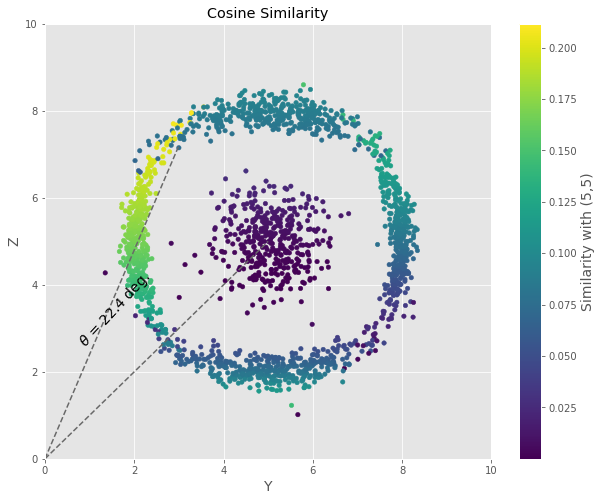

In [21]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

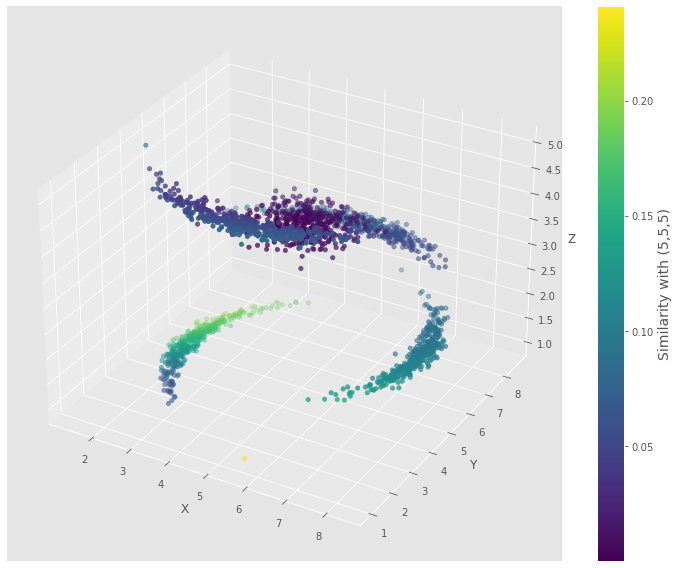

In [28]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(mat[:,0], mat[:,1], mat[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [33]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

Finding similarity between definitions given by IBM and Wikipedia for Machine Learning

In [ ]:
IBM_defn = "Machine learning is a branch of artificial intelligence and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy"
wiki_defn = "Machine learning is the study of computer algorithms that improve automatically through experience and by the use of data. It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so"

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [36]:
corpus1 = [IBM_defn, wiki_defn]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [37]:
X_train_counts1 = count_vect.fit_transform(corpus1)


 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [38]:
pd.DataFrame(X_train_counts1.toarray(),columns=count_vect.get_feature_names(),index=['IBM_Defn','wiki_Defn'])

,accuracy,algorithms,and,artificial,as,automatically,based,being,branch,build,...,study,that,the,through,to,training,use,way,which,without
IBM_Defn,1,1,2,1,0,0,0,0,1,0,...,0,1,2,0,1,0,1,1,1,0
wiki_Defn,0,2,1,1,2,1,1,1,0,1,...,1,1,2,1,2,1,1,0,0,1


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [41]:
vectorizer1 = TfidfVectorizer()
trsfm1=vectorizer1.fit_transform(corpus1)
pd.DataFrame(trsfm1.toarray(),columns=vectorizer1.get_feature_names(),index=['IBM_Defn','wiki_Defn'])

,accuracy,algorithms,and,artificial,as,automatically,based,being,branch,build,...,study,that,the,through,to,training,use,way,which,without
IBM_Defn,0.20349,0.144785,0.289569,0.144785,0.000000,0.000000,0.000000,0.000000,0.20349,0.000000,...,0.000000,0.144785,0.289569,0.000000,0.144785,0.000000,0.144785,0.20349,0.20349,0.000000
wiki_Defn,0.00000,0.190489,0.095244,0.095244,0.267725,0.133863,0.133863,0.133863,0.00000,0.133863,...,0.133863,0.095244,0.190489,0.133863,0.190489,0.133863,0.095244,0.00000,0.00000,0.133863


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [42]:
cosine_similarity(trsfm1, trsfm1)

array([[1.        , 0.42748809],
       [0.42748809, 1.        ]])